<a href="https://colab.research.google.com/github/chuchun2/ATMS597-Project6-GroupB/blob/master/ATMS597_Project6_GroupB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pylab inline
import xarray as xr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import re
from google.colab import drive
drive.mount('/content/drive')

Populating the interactive namespace from numpy and matplotlib
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
# Set your directory path
YOUR_DIRECTORY = '/content/drive/My Drive/ATMS597 Weather Climate Data Analysis/Module 6/Project 6/'  # Chu-Chun
# YOUR_DIRECTORY = '/content/drive/My Drive/Colab Notebooks/Project_6/' # Jeff

In [0]:
# Load saved combined data
SESA_MJOIndices_df = pd.read_csv(YOUR_DIRECTORY + 'SESA_Avg_Precip_MJOIndices_SoilMoisture.csv', index_col = 'Unnamed: 0')
SESA_MJOIndices_df.index = pd.to_datetime(SESA_MJOIndices_df.index)
SESA_MJOIndices_df

,SESA_Avg_GPCP_Precip,MJOPhase_OLR,MJOAmplitude_OLR,SESA_Avg_ERA5_Soil_Moisture_Lev1,SESA_Avg_ERA5_Soil_Moisture_Lev2,Year,Month,Day,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag30
1996-10-01,0.802094,4,0.4059,0.460888,0.468150,1996,10,1,6.0,6.0,5.0,5.0,5.0,1.0,0.6244,1.3798,1.0795,1.8319,0.5766,0.1080,0.492621,0.391118,0.432100,0.458614,0.449316,0.493759,0.491505,0.412240,0.429575,0.469598,0.461006,0.489766
1996-10-02,1.569398,3,0.4302,0.477875,0.478713,1996,10,2,5.0,6.0,5.0,5.0,5.0,5.0,0.0353,1.0692,1.2913,2.1190,0.8674,0.0653,0.492292,0.384300,0.450946,0.447974,0.438204,0.472939,0.491294,0.407437,0.442633,0.460626,0.451942,0.476704
1996-10-03,17.859299,2,0.4495,0.491203,0.490375,1996,10,3,4.0,6.0,5.0,5.0,5.0,5.0,0.2783,0.9147,1.2725,2.2432,1.2157,0.2746,0.496148,0.425672,0.435107,0.436272,0.501194,0.490613,0.493880,0.413252,0.438342,0.451673,0.478370,0.476392
1996-10-04,20.841913,2,0.3561,0.476827,0.483787,1996,10,4,4.0,6.0,5.0,5.0,5.0,5.0,0.6957,0.8338,1.3071,1.8349,1.4513,0.2632,0.484567,0.457851,0.419107,0.425025,0.483698,0.478728,0.485176,0.418785,0.430604,0.442405,0.491913,0.484252
1996-10-05,15.586549,1,0.5695,0.464411,0.472448,1996,10,5,4.0,6.0,5.0,5.0,5.0,5.0,0.6552,0.9839,1.4173,1.3773,1.6767,0.3715,0.473772,0.490829,0.406261,0.414356,0.468232,0.462643,0.479636,0.480346,0.422279,0.433058,0.478959,0.471617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,0.000000,2,0.3398,0.342145,0.373197,2019,11,26,1.0,8.0,7.0,5.0,4.0,3.0,1.0919,1.3378,1.9191,2.5294,1.8076,1.0424,0.352499,0.450357,0.462952,0.460949,0.427921,0.391507,0.389813,0.461422,0.458716,0.453349,0.428227,0.411377
2019-11-27,0.000000,1,0.6084,0.493269,0.444673,2019,11,27,2.0,8.0,7.0,5.0,5.0,3.0,0.9114,1.4613,1.9520,2.6146,1.9560,0.9014,0.339058,0.427612,0.444662,0.472428,0.409340,0.439617,0.380560,0.446058,0.448385,0.455172,0.420137,0.433978
2019-11-28,0.951774,1,0.7808,0.470274,0.462430,2019,11,28,3.0,8.0,8.0,6.0,5.0,4.0,0.6524,1.7816,1.9104,2.2046,2.2855,1.0290,0.361567,0.405825,0.427252,0.466658,0.422816,0.420148,0.381075,0.430731,0.439063,0.458762,0.421203,0.428518
2019-11-29,2.152993,1,0.9184,0.444326,0.449410,2019,11,29,3.0,8.0,8.0,6.0,5.0,4.0,0.5886,1.3550,1.6640,2.1225,2.4898,0.9807,0.362398,0.385543,0.494899,0.456993,0.447623,0.413893,0.379400,0.415153,0.481285,0.451284,0.431803,0.425161


# (1) linear regression (all variables)

In [0]:
# select the data
data = SESA_MJOIndices_df
data

,SESA_Avg_GPCP_Precip,MJOPhase_OLR,MJOAmplitude_OLR,SESA_Avg_ERA5_Soil_Moisture_Lev1,SESA_Avg_ERA5_Soil_Moisture_Lev2,Year,Month,Day,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag30
1996-10-01,0.802094,4,0.4059,0.460888,0.468150,1996,10,1,6.0,6.0,5.0,5.0,5.0,1.0,0.6244,1.3798,1.0795,1.8319,0.5766,0.1080,0.492621,0.391118,0.432100,0.458614,0.449316,0.493759,0.491505,0.412240,0.429575,0.469598,0.461006,0.489766
1996-10-02,1.569398,3,0.4302,0.477875,0.478713,1996,10,2,5.0,6.0,5.0,5.0,5.0,5.0,0.0353,1.0692,1.2913,2.1190,0.8674,0.0653,0.492292,0.384300,0.450946,0.447974,0.438204,0.472939,0.491294,0.407437,0.442633,0.460626,0.451942,0.476704
1996-10-03,17.859299,2,0.4495,0.491203,0.490375,1996,10,3,4.0,6.0,5.0,5.0,5.0,5.0,0.2783,0.9147,1.2725,2.2432,1.2157,0.2746,0.496148,0.425672,0.435107,0.436272,0.501194,0.490613,0.493880,0.413252,0.438342,0.451673,0.478370,0.476392
1996-10-04,20.841913,2,0.3561,0.476827,0.483787,1996,10,4,4.0,6.0,5.0,5.0,5.0,5.0,0.6957,0.8338,1.3071,1.8349,1.4513,0.2632,0.484567,0.457851,0.419107,0.425025,0.483698,0.478728,0.485176,0.418785,0.430604,0.442405,0.491913,0.484252
1996-10-05,15.586549,1,0.5695,0.464411,0.472448,1996,10,5,4.0,6.0,5.0,5.0,5.0,5.0,0.6552,0.9839,1.4173,1.3773,1.6767,0.3715,0.473772,0.490829,0.406261,0.414356,0.468232,0.462643,0.479636,0.480346,0.422279,0.433058,0.478959,0.471617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,0.000000,2,0.3398,0.342145,0.373197,2019,11,26,1.0,8.0,7.0,5.0,4.0,3.0,1.0919,1.3378,1.9191,2.5294,1.8076,1.0424,0.352499,0.450357,0.462952,0.460949,0.427921,0.391507,0.389813,0.461422,0.458716,0.453349,0.428227,0.411377
2019-11-27,0.000000,1,0.6084,0.493269,0.444673,2019,11,27,2.0,8.0,7.0,5.0,5.0,3.0,0.9114,1.4613,1.9520,2.6146,1.9560,0.9014,0.339058,0.427612,0.444662,0.472428,0.409340,0.439617,0.380560,0.446058,0.448385,0.455172,0.420137,0.433978
2019-11-28,0.951774,1,0.7808,0.470274,0.462430,2019,11,28,3.0,8.0,8.0,6.0,5.0,4.0,0.6524,1.7816,1.9104,2.2046,2.2855,1.0290,0.361567,0.405825,0.427252,0.466658,0.422816,0.420148,0.381075,0.430731,0.439063,0.458762,0.421203,0.428518
2019-11-29,2.152993,1,0.9184,0.444326,0.449410,2019,11,29,3.0,8.0,8.0,6.0,5.0,4.0,0.5886,1.3550,1.6640,2.1225,2.4898,0.9807,0.362398,0.385543,0.494899,0.456993,0.447623,0.413893,0.379400,0.415153,0.481285,0.451284,0.431803,0.425161


RMSE of linear regression model:  9.296464854571711


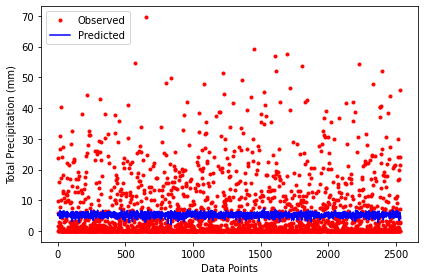

In [0]:
from sklearn.preprocessing import normalize

# Separate observation precipitation and features
y = data['SESA_Avg_GPCP_Precip'].to_numpy()
X = data.drop(columns = ['SESA_Avg_GPCP_Precip']).to_numpy()
X_norm = (X - mean(X, axis=0)) / std(X, axis=0)

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X_norm, y, test_size = 0.3, random_state = 42)

# Linear regression model
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(train_X, train_y)

LinearRegression_predict_y = model_LinearRegression.predict(test_X)
rmse_LinearRegression = sqrt(mean_squared_error(test_y, LinearRegression_predict_y))
print('RMSE of linear regression model: ', rmse_LinearRegression)

# Plot testing data and model prediction
plt.plot(test_y, '.', color='r', label='Observed')
plt.plot(LinearRegression_predict_y, '-', color='b', label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Data Points')
plt.ylabel('Total Precipitation (mm)')
plt.tight_layout()
plt.savefig(YOUR_DIRECTORY + 'LinearRegression_SESA_PRCP.png', dpi=600)

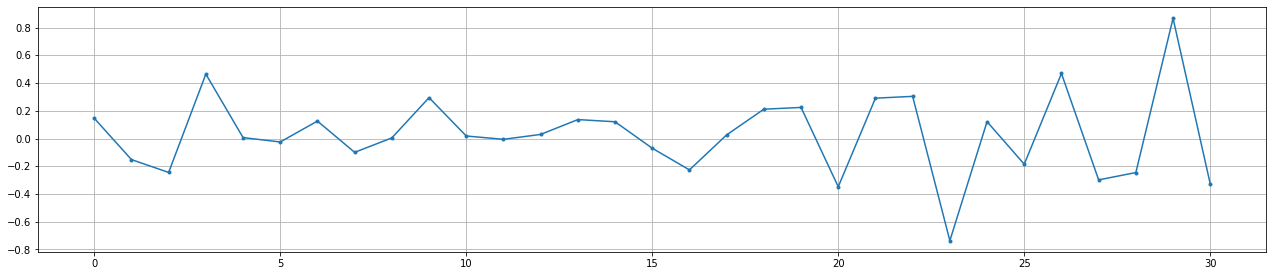

In [0]:
plt.figure(figsize=(22, 4.5))
plt.plot(model_LinearRegression.coef_, '.-')
plt.grid()

# (2) linear regression (all variables, Oct to Mar)

In [0]:
# select the data
data = SESA_MJOIndices_df[~SESA_MJOIndices_df.index.month.isin([4, 5, 6, 7, 8, 9])]
data

,SESA_Avg_GPCP_Precip,MJOPhase_OLR,MJOAmplitude_OLR,SESA_Avg_ERA5_Soil_Moisture_Lev1,SESA_Avg_ERA5_Soil_Moisture_Lev2,Year,Month,Day,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag30
1996-10-01,0.802094,4,0.4059,0.460888,0.468150,1996,10,1,6.0,6.0,5.0,5.0,5.0,1.0,0.6244,1.3798,1.0795,1.8319,0.5766,0.1080,0.492621,0.391118,0.432100,0.458614,0.449316,0.493759,0.491505,0.412240,0.429575,0.469598,0.461006,0.489766
1996-10-02,1.569398,3,0.4302,0.477875,0.478713,1996,10,2,5.0,6.0,5.0,5.0,5.0,5.0,0.0353,1.0692,1.2913,2.1190,0.8674,0.0653,0.492292,0.384300,0.450946,0.447974,0.438204,0.472939,0.491294,0.407437,0.442633,0.460626,0.451942,0.476704
1996-10-03,17.859299,2,0.4495,0.491203,0.490375,1996,10,3,4.0,6.0,5.0,5.0,5.0,5.0,0.2783,0.9147,1.2725,2.2432,1.2157,0.2746,0.496148,0.425672,0.435107,0.436272,0.501194,0.490613,0.493880,0.413252,0.438342,0.451673,0.478370,0.476392
1996-10-04,20.841913,2,0.3561,0.476827,0.483787,1996,10,4,4.0,6.0,5.0,5.0,5.0,5.0,0.6957,0.8338,1.3071,1.8349,1.4513,0.2632,0.484567,0.457851,0.419107,0.425025,0.483698,0.478728,0.485176,0.418785,0.430604,0.442405,0.491913,0.484252
1996-10-05,15.586549,1,0.5695,0.464411,0.472448,1996,10,5,4.0,6.0,5.0,5.0,5.0,5.0,0.6552,0.9839,1.4173,1.3773,1.6767,0.3715,0.473772,0.490829,0.406261,0.414356,0.468232,0.462643,0.479636,0.480346,0.422279,0.433058,0.478959,0.471617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,0.000000,2,0.3398,0.342145,0.373197,2019,11,26,1.0,8.0,7.0,5.0,4.0,3.0,1.0919,1.3378,1.9191,2.5294,1.8076,1.0424,0.352499,0.450357,0.462952,0.460949,0.427921,0.391507,0.389813,0.461422,0.458716,0.453349,0.428227,0.411377
2019-11-27,0.000000,1,0.6084,0.493269,0.444673,2019,11,27,2.0,8.0,7.0,5.0,5.0,3.0,0.9114,1.4613,1.9520,2.6146,1.9560,0.9014,0.339058,0.427612,0.444662,0.472428,0.409340,0.439617,0.380560,0.446058,0.448385,0.455172,0.420137,0.433978
2019-11-28,0.951774,1,0.7808,0.470274,0.462430,2019,11,28,3.0,8.0,8.0,6.0,5.0,4.0,0.6524,1.7816,1.9104,2.2046,2.2855,1.0290,0.361567,0.405825,0.427252,0.466658,0.422816,0.420148,0.381075,0.430731,0.439063,0.458762,0.421203,0.428518
2019-11-29,2.152993,1,0.9184,0.444326,0.449410,2019,11,29,3.0,8.0,8.0,6.0,5.0,4.0,0.5886,1.3550,1.6640,2.1225,2.4898,0.9807,0.362398,0.385543,0.494899,0.456993,0.447623,0.413893,0.379400,0.415153,0.481285,0.451284,0.431803,0.425161


RMSE of linear regression model:  9.639964764958183


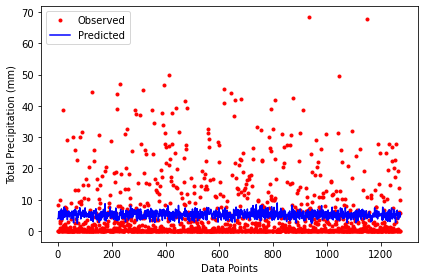

In [0]:
from sklearn.preprocessing import normalize

# Separate observation precipitation and features
y = data['SESA_Avg_GPCP_Precip'].to_numpy()
X = data.drop(columns = ['SESA_Avg_GPCP_Precip']).to_numpy()
X_norm = (X - mean(X, axis=0)) / std(X, axis=0)

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X_norm, y, test_size = 0.3, random_state = 42)

# Linear regression model
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(train_X, train_y)

LinearRegression_predict_y = model_LinearRegression.predict(test_X)
rmse_LinearRegression = sqrt(mean_squared_error(test_y, LinearRegression_predict_y))
print('RMSE of linear regression model: ', rmse_LinearRegression)

# Plot testing data and model prediction
plt.plot(test_y, '.', color='r', label='Observed')
plt.plot(LinearRegression_predict_y, '-', color='b', label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Data Points')
plt.ylabel('Total Precipitation (mm)')
plt.tight_layout()

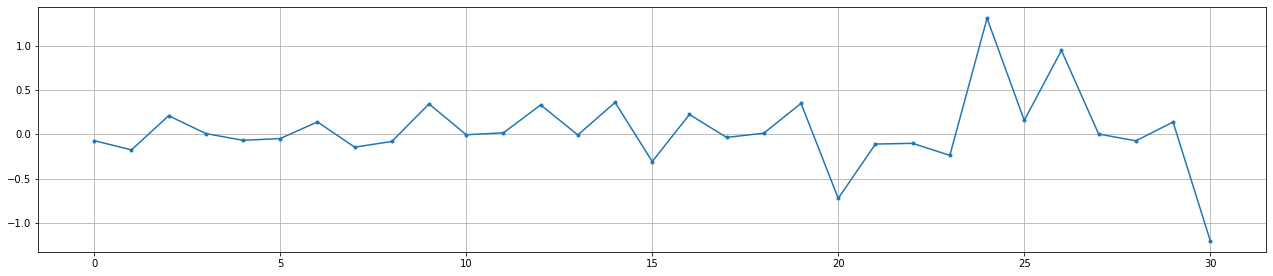

In [0]:
plt.figure(figsize=(22, 4.5))
plt.plot(model_LinearRegression.coef_, '.-')
plt.grid()

# (3) linear regression (no soil moisture variables)

In [0]:
# select the data
data = SESA_MJOIndices_df.drop(columns = [word for word in SESA_MJOIndices_df.columns if re.search('.Soil_Moisture.', word)])
data

,SESA_Avg_GPCP_Precip,MJOPhase_OLR,MJOAmplitude_OLR,Year,Month,Day,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30
1996-10-01,0.802094,4,0.4059,1996,10,1,6.0,6.0,5.0,5.0,5.0,1.0,0.6244,1.3798,1.0795,1.8319,0.5766,0.1080
1996-10-02,1.569398,3,0.4302,1996,10,2,5.0,6.0,5.0,5.0,5.0,5.0,0.0353,1.0692,1.2913,2.1190,0.8674,0.0653
1996-10-03,17.859299,2,0.4495,1996,10,3,4.0,6.0,5.0,5.0,5.0,5.0,0.2783,0.9147,1.2725,2.2432,1.2157,0.2746
1996-10-04,20.841913,2,0.3561,1996,10,4,4.0,6.0,5.0,5.0,5.0,5.0,0.6957,0.8338,1.3071,1.8349,1.4513,0.2632
1996-10-05,15.586549,1,0.5695,1996,10,5,4.0,6.0,5.0,5.0,5.0,5.0,0.6552,0.9839,1.4173,1.3773,1.6767,0.3715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,0.000000,2,0.3398,2019,11,26,1.0,8.0,7.0,5.0,4.0,3.0,1.0919,1.3378,1.9191,2.5294,1.8076,1.0424
2019-11-27,0.000000,1,0.6084,2019,11,27,2.0,8.0,7.0,5.0,5.0,3.0,0.9114,1.4613,1.9520,2.6146,1.9560,0.9014
2019-11-28,0.951774,1,0.7808,2019,11,28,3.0,8.0,8.0,6.0,5.0,4.0,0.6524,1.7816,1.9104,2.2046,2.2855,1.0290
2019-11-29,2.152993,1,0.9184,2019,11,29,3.0,8.0,8.0,6.0,5.0,4.0,0.5886,1.3550,1.6640,2.1225,2.4898,0.9807


RMSE of linear regression model:  9.29609568628369


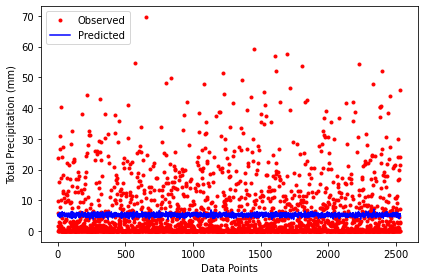

In [0]:
from sklearn.preprocessing import normalize

# Separate observation precipitation and features
y = data['SESA_Avg_GPCP_Precip'].to_numpy()
X = data.drop(columns = ['SESA_Avg_GPCP_Precip']).to_numpy()
X_norm = (X - mean(X, axis=0)) / std(X, axis=0)

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X_norm, y, test_size = 0.3, random_state = 42)

# Linear regression model
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(train_X, train_y)

LinearRegression_predict_y = model_LinearRegression.predict(test_X)
rmse_LinearRegression = sqrt(mean_squared_error(test_y, LinearRegression_predict_y))
print('RMSE of linear regression model: ', rmse_LinearRegression)

# Plot testing data and model prediction
plt.plot(test_y, '.', color='r', label='Observed')
plt.plot(LinearRegression_predict_y, '-', color='b', label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Data Points')
plt.ylabel('Total Precipitation (mm)')
plt.tight_layout()

# (4) linear regression (no soil moisture variables, Oct to Mar)

In [0]:
# select the data
data = SESA_MJOIndices_df.drop(columns = [word for word in SESA_MJOIndices_df.columns if re.search('.Soil_Moisture.', word)])
data = data[~data.index.month.isin([4, 5, 6, 7, 8, 9])]
data

,SESA_Avg_GPCP_Precip,MJOPhase_OLR,MJOAmplitude_OLR,Year,Month,Day,MJOPhase_OLR_lag5,MJOPhase_OLR_lag10,MJOPhase_OLR_lag15,MJOPhase_OLR_lag20,MJOPhase_OLR_lag25,MJOPhase_OLR_lag30,MJOAmplitude_OLR_lag5,MJOAmplitude_OLR_lag10,MJOAmplitude_OLR_lag15,MJOAmplitude_OLR_lag20,MJOAmplitude_OLR_lag25,MJOAmplitude_OLR_lag30
1996-10-01,0.802094,4,0.4059,1996,10,1,6.0,6.0,5.0,5.0,5.0,1.0,0.6244,1.3798,1.0795,1.8319,0.5766,0.1080
1996-10-02,1.569398,3,0.4302,1996,10,2,5.0,6.0,5.0,5.0,5.0,5.0,0.0353,1.0692,1.2913,2.1190,0.8674,0.0653
1996-10-03,17.859299,2,0.4495,1996,10,3,4.0,6.0,5.0,5.0,5.0,5.0,0.2783,0.9147,1.2725,2.2432,1.2157,0.2746
1996-10-04,20.841913,2,0.3561,1996,10,4,4.0,6.0,5.0,5.0,5.0,5.0,0.6957,0.8338,1.3071,1.8349,1.4513,0.2632
1996-10-05,15.586549,1,0.5695,1996,10,5,4.0,6.0,5.0,5.0,5.0,5.0,0.6552,0.9839,1.4173,1.3773,1.6767,0.3715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,0.000000,2,0.3398,2019,11,26,1.0,8.0,7.0,5.0,4.0,3.0,1.0919,1.3378,1.9191,2.5294,1.8076,1.0424
2019-11-27,0.000000,1,0.6084,2019,11,27,2.0,8.0,7.0,5.0,5.0,3.0,0.9114,1.4613,1.9520,2.6146,1.9560,0.9014
2019-11-28,0.951774,1,0.7808,2019,11,28,3.0,8.0,8.0,6.0,5.0,4.0,0.6524,1.7816,1.9104,2.2046,2.2855,1.0290
2019-11-29,2.152993,1,0.9184,2019,11,29,3.0,8.0,8.0,6.0,5.0,4.0,0.5886,1.3550,1.6640,2.1225,2.4898,0.9807


RMSE of linear regression model:  9.643996894497324


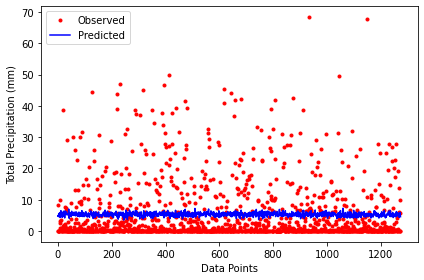

In [0]:
from sklearn.preprocessing import normalize

# Separate observation precipitation and features
y = data['SESA_Avg_GPCP_Precip'].to_numpy()
X = data.drop(columns = ['SESA_Avg_GPCP_Precip']).to_numpy()
X_norm = (X - mean(X, axis=0)) / std(X, axis=0)

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X_norm, y, test_size = 0.3, random_state = 42)

# Linear regression model
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(train_X, train_y)

LinearRegression_predict_y = model_LinearRegression.predict(test_X)
rmse_LinearRegression = sqrt(mean_squared_error(test_y, LinearRegression_predict_y))
print('RMSE of linear regression model: ', rmse_LinearRegression)

# Plot testing data and model prediction
plt.plot(test_y, '.', color='r', label='Observed')
plt.plot(LinearRegression_predict_y, '-', color='b', label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Data Points')
plt.ylabel('Total Precipitation (mm)')
plt.tight_layout()

# (5) linear regression (no MJO variables)

In [0]:
# select the data
data = SESA_MJOIndices_df.drop(columns = [word for word in SESA_MJOIndices_df.columns if re.search('MJO.', word)])
data

,SESA_Avg_GPCP_Precip,SESA_Avg_ERA5_Soil_Moisture_Lev1,SESA_Avg_ERA5_Soil_Moisture_Lev2,Year,Month,Day,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag30
1996-10-01,0.802094,0.460888,0.468150,1996,10,1,0.492621,0.391118,0.432100,0.458614,0.449316,0.493759,0.491505,0.412240,0.429575,0.469598,0.461006,0.489766
1996-10-02,1.569398,0.477875,0.478713,1996,10,2,0.492292,0.384300,0.450946,0.447974,0.438204,0.472939,0.491294,0.407437,0.442633,0.460626,0.451942,0.476704
1996-10-03,17.859299,0.491203,0.490375,1996,10,3,0.496148,0.425672,0.435107,0.436272,0.501194,0.490613,0.493880,0.413252,0.438342,0.451673,0.478370,0.476392
1996-10-04,20.841913,0.476827,0.483787,1996,10,4,0.484567,0.457851,0.419107,0.425025,0.483698,0.478728,0.485176,0.418785,0.430604,0.442405,0.491913,0.484252
1996-10-05,15.586549,0.464411,0.472448,1996,10,5,0.473772,0.490829,0.406261,0.414356,0.468232,0.462643,0.479636,0.480346,0.422279,0.433058,0.478959,0.471617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,0.000000,0.342145,0.373197,2019,11,26,0.352499,0.450357,0.462952,0.460949,0.427921,0.391507,0.389813,0.461422,0.458716,0.453349,0.428227,0.411377
2019-11-27,0.000000,0.493269,0.444673,2019,11,27,0.339058,0.427612,0.444662,0.472428,0.409340,0.439617,0.380560,0.446058,0.448385,0.455172,0.420137,0.433978
2019-11-28,0.951774,0.470274,0.462430,2019,11,28,0.361567,0.405825,0.427252,0.466658,0.422816,0.420148,0.381075,0.430731,0.439063,0.458762,0.421203,0.428518
2019-11-29,2.152993,0.444326,0.449410,2019,11,29,0.362398,0.385543,0.494899,0.456993,0.447623,0.413893,0.379400,0.415153,0.481285,0.451284,0.431803,0.425161


RMSE of linear regression model:  9.300578312263378


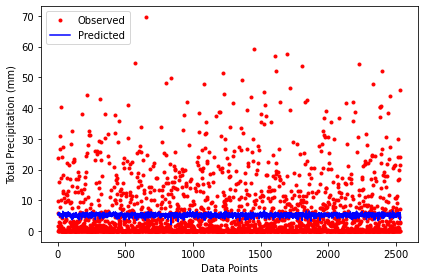

In [0]:
from sklearn.preprocessing import normalize

# Separate observation precipitation and features
y = data['SESA_Avg_GPCP_Precip'].to_numpy()
X = data.drop(columns = ['SESA_Avg_GPCP_Precip']).to_numpy()
X_norm = (X - mean(X, axis=0)) / std(X, axis=0)

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X_norm, y, test_size = 0.3, random_state = 42)

# Linear regression model
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(train_X, train_y)

LinearRegression_predict_y = model_LinearRegression.predict(test_X)
rmse_LinearRegression = sqrt(mean_squared_error(test_y, LinearRegression_predict_y))
print('RMSE of linear regression model: ', rmse_LinearRegression)

# Plot testing data and model prediction
plt.plot(test_y, '.', color='r', label='Observed')
plt.plot(LinearRegression_predict_y, '-', color='b', label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Data Points')
plt.ylabel('Total Precipitation (mm)')
plt.tight_layout()

# (6) linear regression (no MJO variables, Oct to Mar)

In [0]:
# select the data
data = SESA_MJOIndices_df.drop(columns = [word for word in SESA_MJOIndices_df.columns if re.search('MJO.', word)])
data = data[~data.index.month.isin([4, 5, 6, 7, 8, 9])]
data

,SESA_Avg_GPCP_Precip,SESA_Avg_ERA5_Soil_Moisture_Lev1,SESA_Avg_ERA5_Soil_Moisture_Lev2,Year,Month,Day,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev1_lag30,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag5,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag10,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag15,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag20,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag25,SESA_Avg_ERA5_Soil_Moisture_Lev2_lag30
1996-10-01,0.802094,0.460888,0.468150,1996,10,1,0.492621,0.391118,0.432100,0.458614,0.449316,0.493759,0.491505,0.412240,0.429575,0.469598,0.461006,0.489766
1996-10-02,1.569398,0.477875,0.478713,1996,10,2,0.492292,0.384300,0.450946,0.447974,0.438204,0.472939,0.491294,0.407437,0.442633,0.460626,0.451942,0.476704
1996-10-03,17.859299,0.491203,0.490375,1996,10,3,0.496148,0.425672,0.435107,0.436272,0.501194,0.490613,0.493880,0.413252,0.438342,0.451673,0.478370,0.476392
1996-10-04,20.841913,0.476827,0.483787,1996,10,4,0.484567,0.457851,0.419107,0.425025,0.483698,0.478728,0.485176,0.418785,0.430604,0.442405,0.491913,0.484252
1996-10-05,15.586549,0.464411,0.472448,1996,10,5,0.473772,0.490829,0.406261,0.414356,0.468232,0.462643,0.479636,0.480346,0.422279,0.433058,0.478959,0.471617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,0.000000,0.342145,0.373197,2019,11,26,0.352499,0.450357,0.462952,0.460949,0.427921,0.391507,0.389813,0.461422,0.458716,0.453349,0.428227,0.411377
2019-11-27,0.000000,0.493269,0.444673,2019,11,27,0.339058,0.427612,0.444662,0.472428,0.409340,0.439617,0.380560,0.446058,0.448385,0.455172,0.420137,0.433978
2019-11-28,0.951774,0.470274,0.462430,2019,11,28,0.361567,0.405825,0.427252,0.466658,0.422816,0.420148,0.381075,0.430731,0.439063,0.458762,0.421203,0.428518
2019-11-29,2.152993,0.444326,0.449410,2019,11,29,0.362398,0.385543,0.494899,0.456993,0.447623,0.413893,0.379400,0.415153,0.481285,0.451284,0.431803,0.425161


RMSE of linear regression model:  9.62708204896965


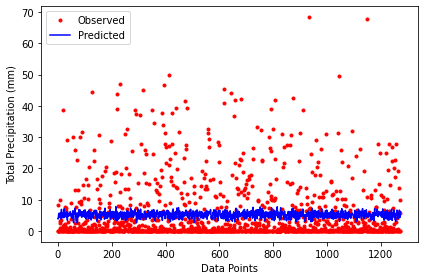

In [0]:
from sklearn.preprocessing import normalize

# Separate observation precipitation and features
y = data['SESA_Avg_GPCP_Precip'].to_numpy()
X = data.drop(columns = ['SESA_Avg_GPCP_Precip']).to_numpy()
X_norm = (X - mean(X, axis=0)) / std(X, axis=0)

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X_norm, y, test_size = 0.3, random_state = 42)

# Linear regression model
model_LinearRegression = LinearRegression()
model_LinearRegression.fit(train_X, train_y)

LinearRegression_predict_y = model_LinearRegression.predict(test_X)
rmse_LinearRegression = sqrt(mean_squared_error(test_y, LinearRegression_predict_y))
print('RMSE of linear regression model: ', rmse_LinearRegression)

# Plot testing data and model prediction
plt.plot(test_y, '.', color='r', label='Observed')
plt.plot(LinearRegression_predict_y, '-', color='b', label='Predicted')
plt.legend(loc='upper left')
plt.xlabel('Data Points')
plt.ylabel('Total Precipitation (mm)')
plt.tight_layout()